In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving NewspaperData.csv to NewspaperData.csv


In [ ]:
data=pd.read_csv('NewspaperData.csv')

In [ ]:
data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [ ]:
data.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [ ]:
data.shape

(34, 3)

In [ ]:
data.size

102

In [ ]:
data.corr()

<ipython-input-12-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [ ]:
import seaborn as sns

<ipython-input-14-0e3f587631a0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['daily'])


<Axes: xlabel='daily', ylabel='Density'>

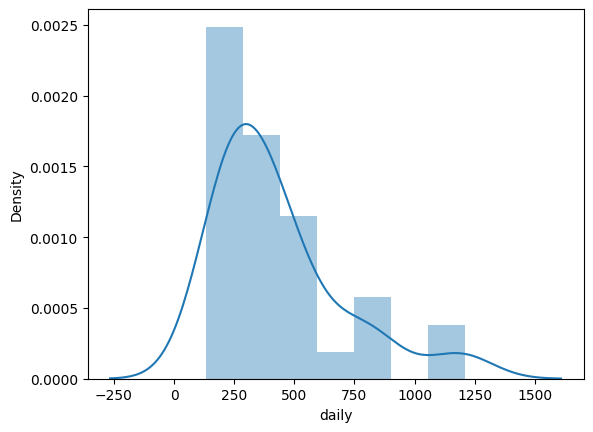

In [ ]:
sns.distplot(data['daily'])

<ipython-input-15-b7ac0e12690b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sunday'])


<Axes: xlabel='sunday', ylabel='Density'>

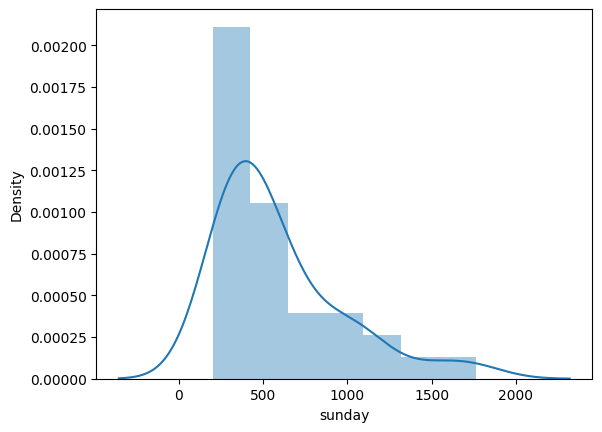

In [ ]:
sns.distplot(data['sunday'])

Fitting a linear regression model

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model=smf.ols('sunday~daily',data=data).fit()

<Axes: xlabel='daily', ylabel='sunday'>

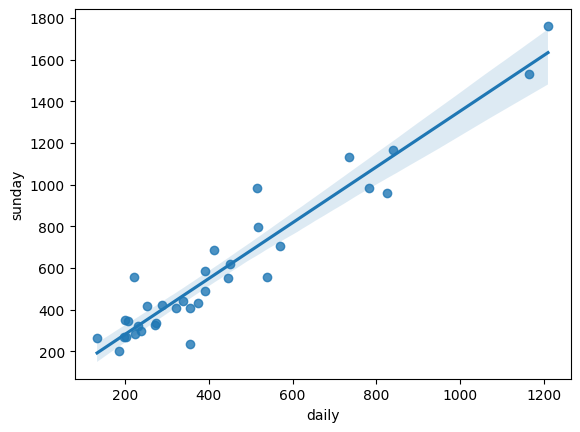

In [ ]:
sns.regplot(x='daily',y='sunday',data=data)

In [ ]:
#Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [ ]:
#1100
#Manually calculating
(1.339715*1100)+13.835630

1487.52213

In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

Predict for a new datapoint(with code not manually)

In [ ]:
#Predict for 200 and 300 daily circulation
newdata1=pd.Series([200,300])

In [ ]:
data_pred1=pd.DataFrame(newdata1,columns=['daily'])

In [ ]:
model.predict(data_pred1)

0    281.778581
1    415.750057
dtype: float64

In [ ]:
#Predict value for 150,240
newdata2=pd.Series([150,240])

In [ ]:
data_pred2=pd.DataFrame(newdata2,columns=['daily'])

In [ ]:
model.predict(data_pred2)

0    214.792844
1    335.367172
dtype: float64